In [1]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
TRAIN_DATASET_PATH='data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [5]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [6]:
test_image_flair.shape

(240, 240, 155)

### Rescale the loaded image

Scalers are applied to 1D so Let us reshape and then reshape back to original shape.

In [7]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [8]:
print(test_image_flair.max())

1.0


In [9]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [10]:
print(np.unique(test_mask))
test_mask[test_mask ==4] = 3
print(np.unique(test_mask))

[0 1 2 4]
[0 1 2 3]


In [11]:
import random
n_slice = random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

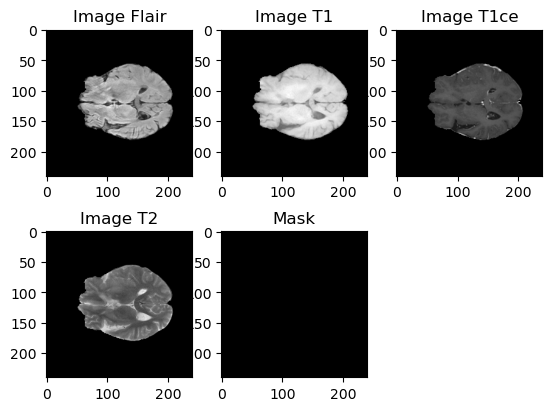

In [12]:
plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image Flair')

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image T1')

plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image T1ce')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image T2')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image T2')

plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title('Mask')
plt.show()

## Part 2 : Exploring the process of combining images to channels

### Combine t1ce, t2, and flare into single multichannel image

In [13]:
combined_x = np.stack([test_image_flair, test_image_t2, test_image_t1ce], axis=3)
print("Dimensions of the stacked images: ",combined_x.shape)

Dimensions of the stacked images:  (240, 240, 155, 3)


In [14]:
combined_x = combined_x[56:184, 56:184, 13:141] # Crop to 128x128 

In [15]:
print("Dimension of cropped image: ", combined_x.shape)

Dimension of cropped image:  (128, 128, 128, 3)


In [16]:
# Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice= random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

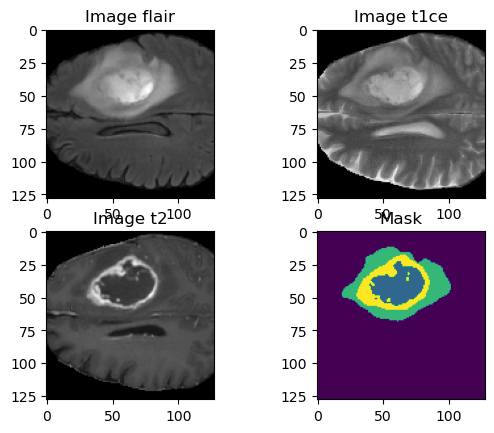

In [17]:
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [18]:
imsave('data/BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('data/BraTS2020_TrainingData/combined255.npy', combined_x)

C:\Windows\Temp\ipykernel_13412\4188789796.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('data/BraTS2020_TrainingData/combined255.tif', combined_x)


In [18]:
# Loading save numpy array
my_img = np.load('data/BraTS2020_TrainingData/combined255.npy')

In [19]:
# Verifying if the saved image is same as combined_x

combined_x== my_img.all()

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [20]:
test_mask = to_categorical(test_mask, num_classes=4)

### Apply the data loading techniques to the Training Folder

#### Merge channels, crop, patchify, save

In [21]:
t2_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii')) # 369 files, 0 - 368
t1ce_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [22]:
len(t2_list)


369

In [24]:
for img in range(len(t2_list)): # using t2 list as length of all the lists is the same
    print("Now preparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(test_image_t2.shape)

    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(test_image_flair.shape)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask [temp_mask ==4] = 3 

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches
    #Cropping x, y, z

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if( 1 - (counts[0]/ counts.sum())) > 0.01:
        print("Save me")
        temp_mask = to_categorical(temp_mask, num_classes=4)
        np.save('data/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('data/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
    else:
        print('I am useless')

Now preparing image and masks number:  0
Save me
Now preparing image and masks number:  1
Save me
Now preparing image and masks number:  2
Save me
Now preparing image and masks number:  3
Save me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save me
Now preparing image and masks number:  6
Save me
Now preparing image and masks number:  7
Save me
Now preparing image and masks number:  8
Save me
Now preparing image and masks number:  9
Save me
Now preparing image and masks number:  10
Save me
Now preparing image and masks number:  11
Save me
Now preparing image and masks number:  12
Save me
Now preparing image and masks number:  13
Save me
Now preparing image and masks number:  14
Save me
Now preparing image and masks number:  15
Save me
Now preparing image and masks number:  16
Save me
Now preparing image and masks number:  17
Save me
Now preparing image and masks number:  18
Save me
Now preparing image and masks number:  19
Save me
Now p

In [23]:
import splitfolders

In [24]:
input_folder = 'data/BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'data/BraTS2020_TrainingData/input_data_128/'

In [33]:
splitfolders.ratio(input=input_folder, output=output_folder, seed=42, ratio=(0.75, 0.25), group_prefix=None)

Copying files: 688 files [00:38, 17.80 files/s]


### Custom Data Generator

Loading Data from the local directory in batches.

In [25]:
import os
import numpy as np

In [26]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [27]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield(X, Y) # a tuple with two numpy assrays with batch_size samples

            # using yield instead of return check documentation !!!!

            batch_start += batch_size
            batch_end += batch_size 


In [28]:
# Test the generator

from matplotlib import pyplot as plt
import random

train_img_dir = "data/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "data/BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [29]:
print("Number of images: ", len(train_img_list))
print("Number of image masks: ", len(train_mask_list))

Number of images:  258
Number of image masks:  258


In [30]:
batch_size =1

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

In [31]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

In [32]:
print("Batch image size: ",img.shape)
print("Batch mask size: ",msk.shape)

Batch image size:  (1, 128, 128, 128, 3)
Batch mask size:  (1, 128, 128, 128, 4)


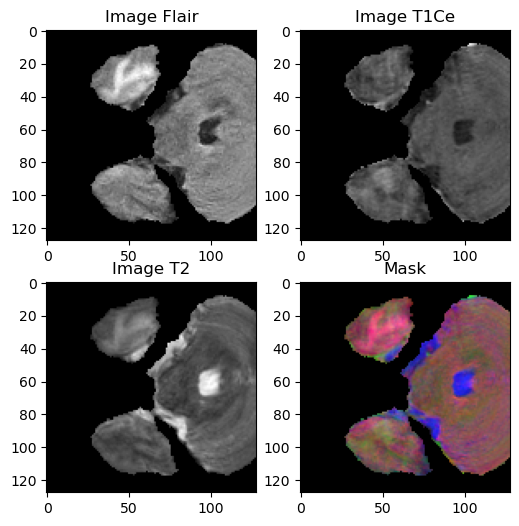

In [33]:
# Randomly selecting a slice from the images in the batch size

img_num = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis =3)

n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(6,6))

plt.subplot(221)
plt.imshow(test_img[:,:, n_slice, 0], cmap='gray')
plt.title('Image Flair')

plt.subplot(222)
plt.imshow(test_img[:,:, n_slice, 1], cmap='gray')
plt.title('Image T1Ce')

plt.subplot(223)
plt.imshow(test_img[:,:, n_slice, 2], cmap='gray')
plt.title('Image T2')

plt.subplot(224)
plt.imshow(test_img[:,:, n_slice])
plt.title('Mask')
plt.show()


## Creating UNet 3D Model

In [34]:

from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer = 'he_uniform'

In [35]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

In [36]:
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [37]:
val_img_dir = "data/BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "data/BraTS2020_TrainingData/input_data_128/val/masks/"

In [38]:
val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [39]:
val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

In [40]:
import segmentation_models_3D as sm


Segmentation Models: using `tf.keras` framework.


In [41]:
import numpy as np
import tensorflow

In [42]:
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = tensorflow.keras.optimizers.Adam(LR)

In [43]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

In [44]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [45]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/100
258/258 [==============================] - 158s 561ms/step - loss: 0.9430 - accuracy: 0.9301 - iou_score: 0.2281 - val_loss: 0.9365 - val_accuracy: 0.8896 - val_iou_score: 0.2586
Epoch 2/100
258/258 [==============================] - 134s 520ms/step - loss: 0.9219 - accuracy: 0.9410 - iou_score: 0.2929 - val_loss: 0.9217 - val_accuracy: 0.9047 - val_iou_score: 0.3299
Epoch 3/100
258/258 [==============================] - 129s 501ms/step - loss: 0.9093 - accuracy: 0.9478 - iou_score: 0.3426 - val_loss: 0.9093 - val_accuracy: 0.9266 - val_iou_score: 0.3610
Epoch 4/100
258/258 [==============================] - 129s 501ms/step - loss: 0.9014 - accuracy: 0.9514 - iou_score: 0.3732 - val_loss: 0.9006 - val_accuracy: 0.9230 - val_iou_score: 0.3789
Epoch 5/100
258/258 [==============================] - 130s 505ms/step - loss: 0.8895 - accuracy: 0.9569 - iou_score: 0.4156 - val_loss: 0.8850 - val_accuracy: 0.9574 - val_iou_score: 0.4243
Epoch 6/100
258/258 [========================

In [46]:
model.save('brats_3d_100epochs.hdf5')

## plot the training and validation IoU and loss at each epoch

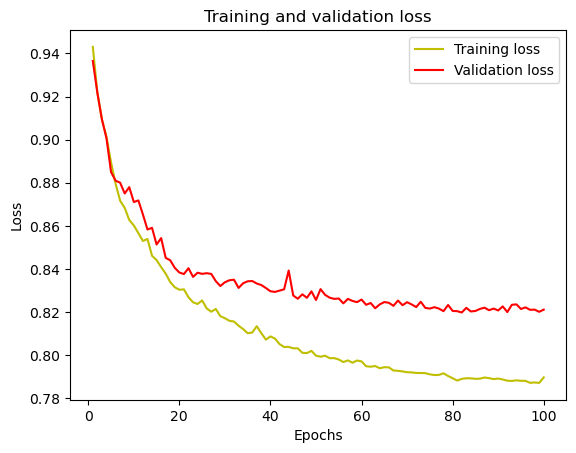

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

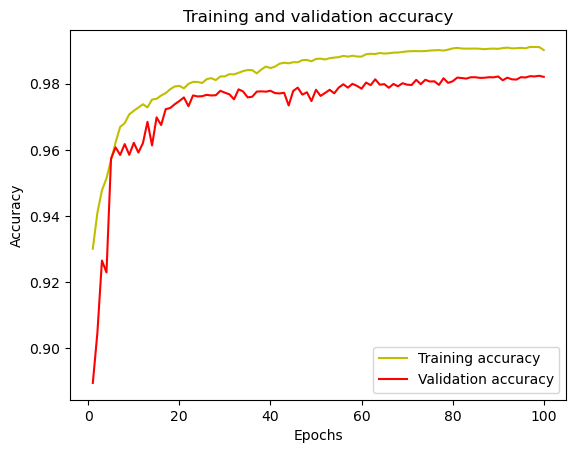

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
from keras.models import load_model

In [50]:
my_model = load_model('brats_3d_100epochs.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

In [55]:
from keras.metrics import MeanIoU

batch_size=3 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.79374415


In [56]:
#Predict on a few test images, one at a time
#Try images: 
img_num = 82

test_img = np.load("data/BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("data/BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

In [57]:
print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax))

(128, 128, 128)
(128, 128, 128)
[0 1 2 3]


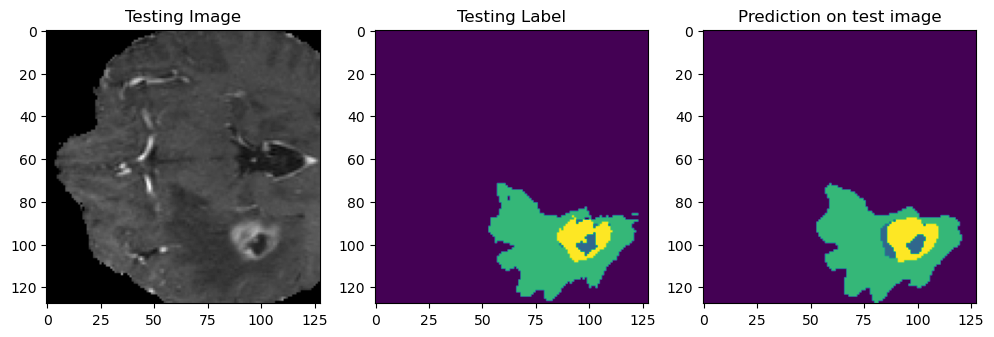

In [72]:
from matplotlib import pyplot as plt
import random

n_slice=random.randint(0, test_prediction_argmax.shape[2])
# n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()